# Part 1--Data Loading and Preprocessing

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
columns = [
    'age', 'class_of_worker', 'detailed_industry_recode', 'detailed_occupation_recode',
    'education', 'wage_per_hour', 'enroll_in_edu_last_week', 'marital_status', 
    'major_industry_code', 'major_occupation_code', 'race', 'hispanic_origin', 
    'sex', 'member_of_a_union', 'reason_for_unemployment', 'employment_status', 
    'capital_gains', 'capital_losses', 'dividends_from_stocks', 'tax_filer_status', 
    'region_of_prev_residence', 'state_of_prev_residence', 'household_family_status',
    'household_summary_in_household', 'migration_code_change_MSA', 'migration_code_change_region', 
    'migration_code_move_within_region', 'lived_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt', 
    'num_persons_worked_for_employer', 'family_members_under_18', 'country_of_birth_father', 
    'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 
    'own_business_or_self_employed', 'fill_inc_questionnaire_for_veterans', 
    'veterans_benefits', 'weeks_worked_in_year', 'year', 'income'
]

# Load the training dataset
data = pd.read_csv('census-income.data', header=None, names=columns)

# Display the first few rows
data.head()

# Preprocessing: Handle missing values and encode categorical features
# Here, we will check for missing values and encode categorical columns using LabelEncoder or OneHotEncoder

# Handle missing values (if any)
data = data.dropna()

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Display first few rows after preprocessing
data.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_last_week,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans,veterans_benefits,weeks_worked_in_year,year,income
73,3,0,0,12,0,2,6,14,6,4,...,40,40,40,4,0,1,2,0,95,0
58,6,4,34,16,0,2,0,4,8,4,...,40,40,40,4,0,1,2,52,94,0
18,3,0,0,0,0,1,4,14,6,1,...,41,41,41,0,0,1,2,0,95,0
9,3,0,0,10,0,2,4,14,6,4,...,40,40,40,4,0,1,0,0,94,0
10,3,0,0,10,0,2,4,14,6,4,...,40,40,40,4,0,1,0,0,94,0


# Part 2--Splitting the Data and Training the Model

In [14]:
# Separate the features (X) and labels (y)
X = data.drop('income', axis=1)  # Features
y = data['income']  # Labels

# Split the data into training and testing sets (70:30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Import the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train the model with max depth of 3
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model on test data
y_pred = clf.predict(X_test)

# Calculate and display performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9466394907863742
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     56275
           1       0.77      0.16      0.26      3582

    accuracy                           0.95     59857
   macro avg       0.86      0.58      0.62     59857
weighted avg       0.94      0.95      0.93     59857



# Part 3--Visualizing the Decision Tree

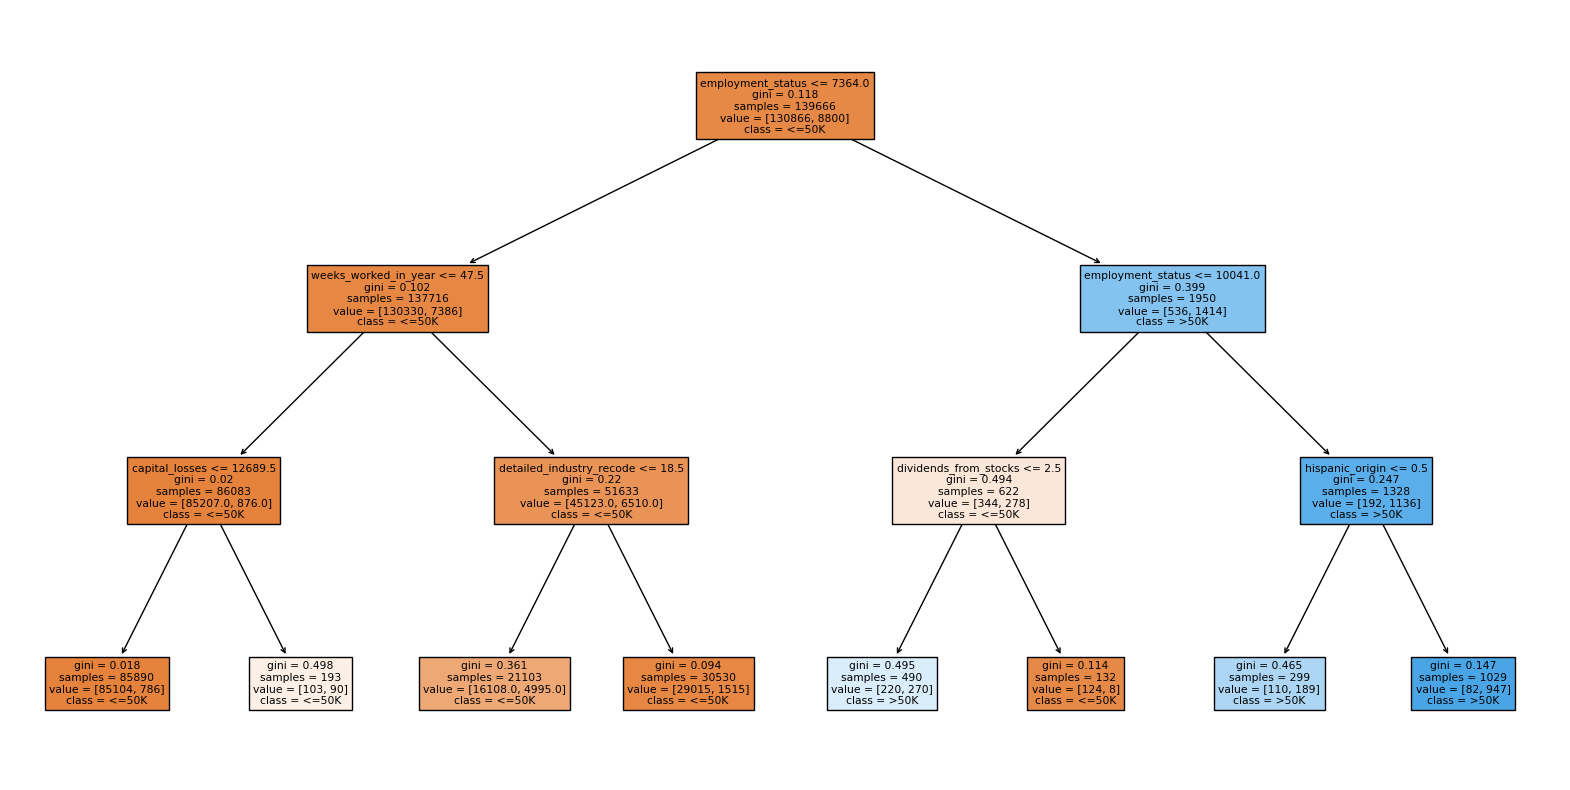

In [17]:
# Import necessary libraries for visualization
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['<=50K', '>50K'], filled=True)
plt.show()

# Part 4--Feature Importance

In [20]:
# Display feature importances
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                                Feature  Importance
15                    employment_status    0.495484
2              detailed_industry_recode    0.230751
38                 weeks_worked_in_year    0.229113
17                       capital_losses    0.021268
18                dividends_from_stocks    0.013216
11                      hispanic_origin    0.010169
30              family_members_under_18    0.000000
25         migration_code_change_region    0.000000
26    migration_code_move_within_region    0.000000
27       lived_in_this_house_1_year_ago    0.000000
28        migration_prev_res_in_sunbelt    0.000000
29      num_persons_worked_for_employer    0.000000
0                                   age    0.000000
23       household_summary_in_household    0.000000
31              country_of_birth_father    0.000000
32              country_of_birth_mother    0.000000
33                country_of_birth_self    0.000000
34                          citizenship    0.000000
35        ow

#### Importance: 
The feature with the highest importance is employment_status with an importance score of 0.495484. This makes sense because employment status directly impacts a person's income, as being employed or underemployed is highly predictive of financial earnings.

The second most important feature, detailed_industry_recode (0.230751), likely reflects how different industries pay varying wages, affecting income classification. Similarly, weeks_worked_in_year (0.229113) captures the extent of labor contributed within the year, impacting income significantly.

Interestingly, features such as age, education, and wage_per_hour, which intuitively might seem important for income prediction, have zero importance in this model. This suggests that the top three features are powerful enough in combination to explain most of the variance in income, making the other features redundant or less useful in this context.

# Part 5--Evaluation on the Test Set

In [29]:
# Load the test dataset
test_data = pd.read_csv('census-income.test', header=None, names=columns)

# Preprocess the test data
# Apply the same LabelEncoder transformation
for column, le in label_encoders.items():
    test_data[column] = le.transform(test_data[column])

# Separate features and labels in test data
X_test_final = test_data.drop('income', axis=1)
y_test_final = test_data['income']

# Predict on the test data
y_test_pred = clf.predict(X_test_final)

# Evaluate the model
print("Accuracy on Test Set:", accuracy_score(y_test_final, y_test_pred))
print("Classification Report on Test Set:\n", classification_report(y_test_final, y_test_pred))

Accuracy on Test Set: 0.9446683105791784
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     93576
           1       0.76      0.16      0.26      6186

    accuracy                           0.94     99762
   macro avg       0.86      0.58      0.61     99762
weighted avg       0.94      0.94      0.93     99762

